In [16]:
import numpy as np

In [17]:
import Euler1D
import matplotlib.pyplot as plt

In [18]:
solver0 = Euler1D.Euler1D("./HLLCTest_WENO/SOD-WENO.txt", SO = False, FD = True)
# solver0.reconstruction_WENO5_cell(0)
xx = np.linspace(0, 1.0, solver0.ncells+1)
t0 = 0.3
cfl = 0.60
global_t = 0.0
while global_t < t0:
    dt = solver0.time_advancement_RK3(cfl = cfl)
    global_t += dt
solver0.con2Prim()

solver1 = Euler1D.Euler1D("./HLLCTest_WENO/SOD-MUSCL.txt", SO = False)
# solver0.reconstruction_WENO5_cell(0)
xx = np.linspace(0, 1.0, solver0.ncells+1)
t0 = 0.3
cfl = 0.60
global_t = 0.0
while global_t < t0:
    dt = solver1.time_advancement_RK3(cfl = cfl)
    global_t += dt
solver1.con2Prim()

============ Selected RS: HLLC ============

============ Selected RS: HLLC ============



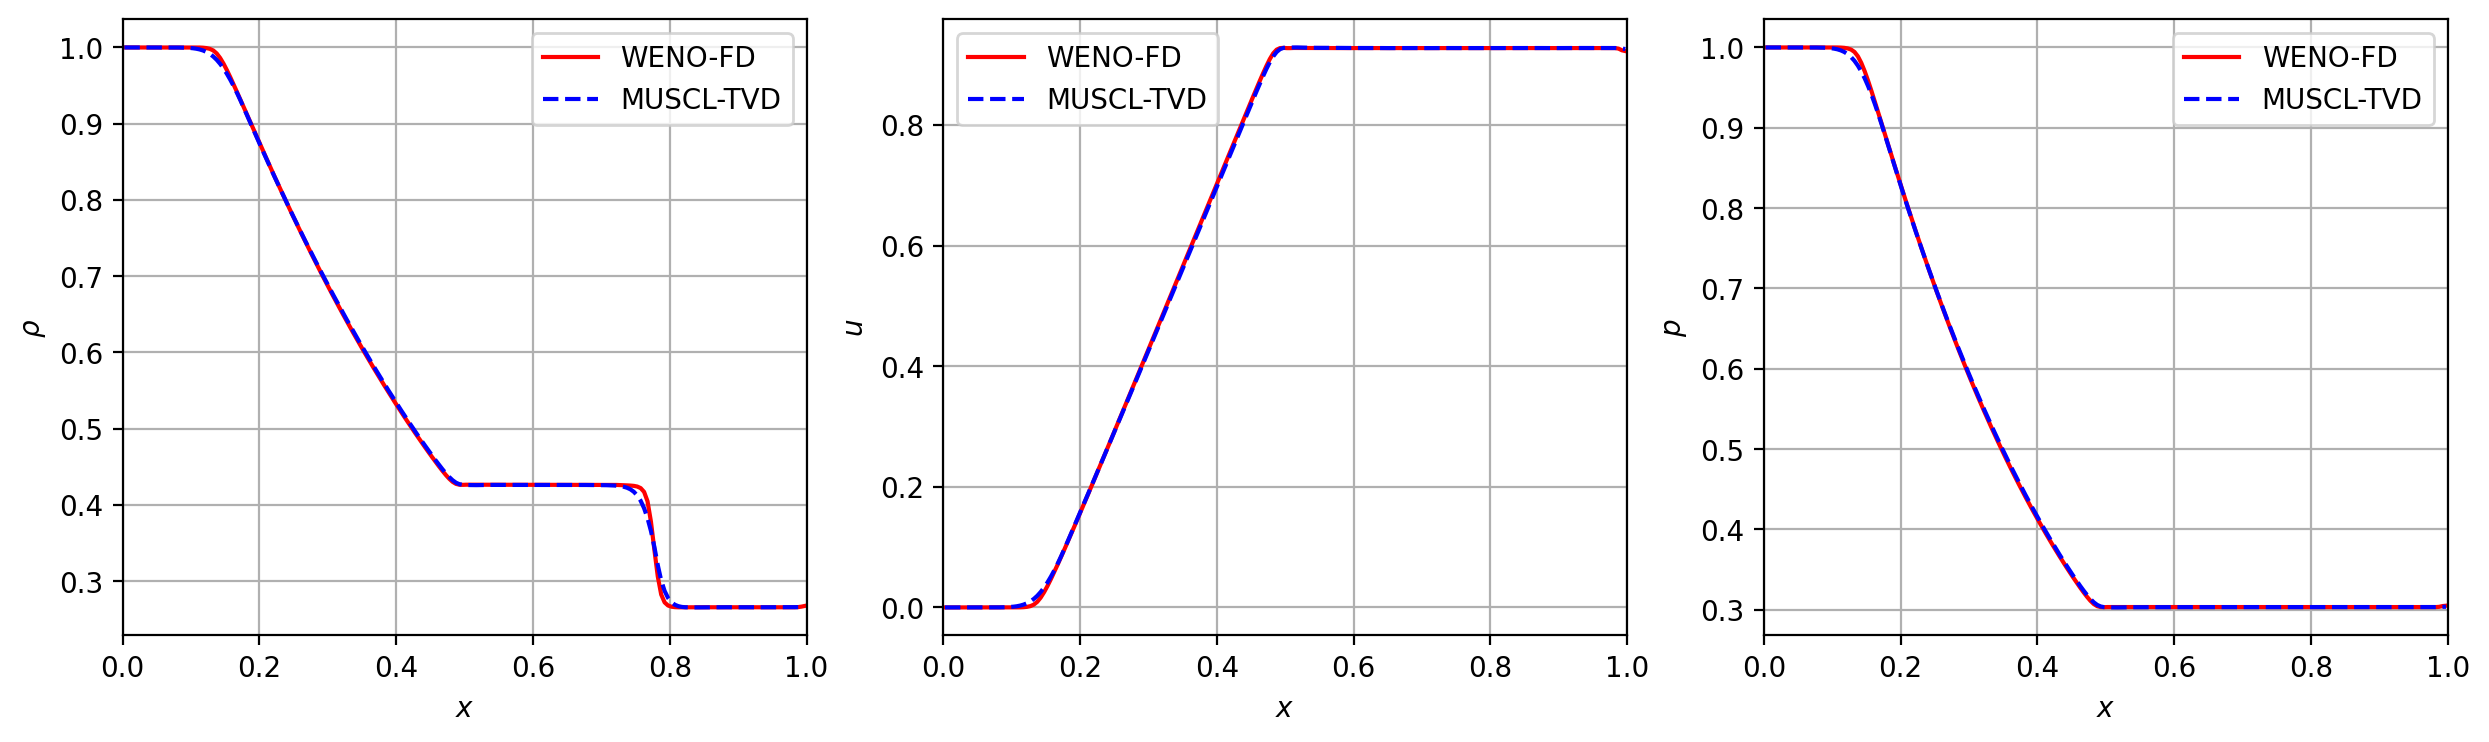

In [19]:
fig, ax = plt.subplots(1,3, figsize = (15,4), dpi = 200, sharex = True)
y_list = [r"$\rho$", r"$u$", r"$p$", r"$e_{int}$"]

for k in range(3):
    ax[k].plot(solver0.mesh, solver0.sol[k, :], label = "WENO-FD", c = "r")
    ax[k].plot(solver1.mesh, solver1.sol[k, :], label = "MUSCL-TVD", linestyle = "dashed", c = "blue")
    ax[k].legend()
    ax[k].grid()
    ax[k].set_xlabel("$x$")
    ax[k].set_ylabel(y_list[k])
    ax[k].set_xlim(0, 1)

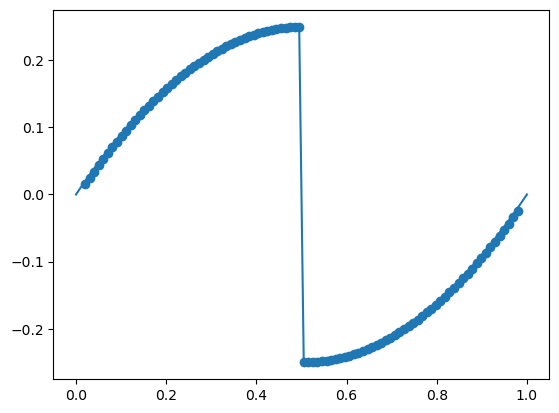

In [19]:
n = 100
ss = np.linspace(0,1,n)
qq = (ss - ss**2) * (ss < 0.5).astype(np.int32)+\
     (ss - ss**2) * (ss >= 0.5).astype(np.int32) * -1.0
rec_l = []
rec_r = []

for i in range(2, n-2):
    q = qq[i-2: i+3]
    w, w_bar = solver0.nonlinear_weight(q)
    qR, qL = solver0.polynomial_WENO5(q)

    rec_l.append(w@qL)
    rec_r.append(w_bar@qR)

plt.plot(ss, qq)
plt.scatter(ss[2:n-2], rec_r)

In [16]:
w_bar@qR

1.7561643836494651

In [15]:
solver0.rec_r[0, 200]

0.13184640984193444